In [1]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()
engine.registerAllMlFunctions()
engine.registerAllSimilarityFunctions()


 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT WORDCLOUD(array_agg(word)) FROM findEvent;



,wordcloud(array_agg(word))
0,True


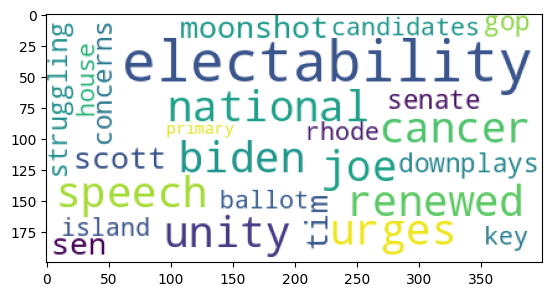

In [2]:
engine.runQuery(""" 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT WORDCLOUD(word) FROM findEvent;
""")

 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(array_agg(wordToken), array_agg(total)) from frequency 





,"hbar(array_agg(wordToken), array_agg(total))"
0,True


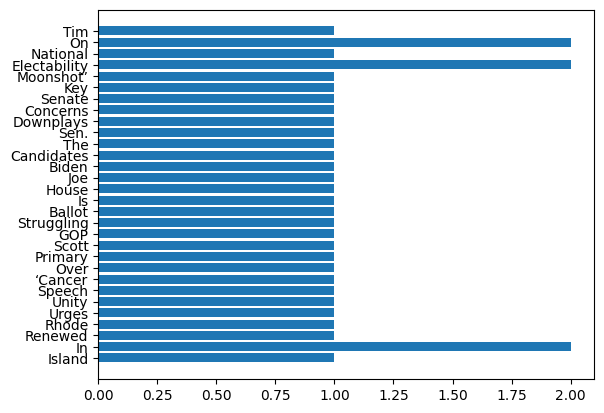

In [3]:
engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(wordToken, total) from frequency 

""")

In [1]:
engine.runQuery(""" 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
aroundNY AS ( 
    SELECT city, latitude, longitude, numberNegativeNews, numberPositiveNews, month
    FROM ny, event e, location l, date d
    WHERE e.locationID = l.locationID AND e.dateID = d.dateID AND RANGE('haversine', 150, [latNY, longNY], [latitude, longitude]) 
) SELECT SCATTER(latitude, longitude, CLUSTER_KMEANS(3, latitude, longitude, numbernegativenews)) from aroundNY 
""")

NameError: name 'engine' is not defined

 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10)
SELECT LINEPLOT(array_agg(latCities), array_agg(longCities)) from cities 




,"lineplot(array_agg(latCities), array_agg(longCities))"
0,True


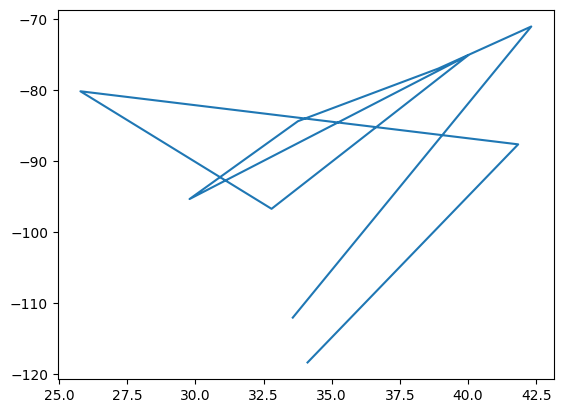

In [5]:
engine.runQuery(""" 
WITH
ny AS ( 
    SELECT latitude AS latNY, longitude AS longNY
    FROM location 
    WHERE city = 'New York'
), 
cities as (SELECT latitude as latCities, longitude as longCities from location WHERE city != 'New York' LIMIT 10)
SELECT LINEPLOT(latCities, longCities) from cities 
""")

 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT VBAR(array_agg(wordToken), array_agg(total)) from frequency 





,"vbar(array_agg(wordToken), array_agg(total))"
0,True


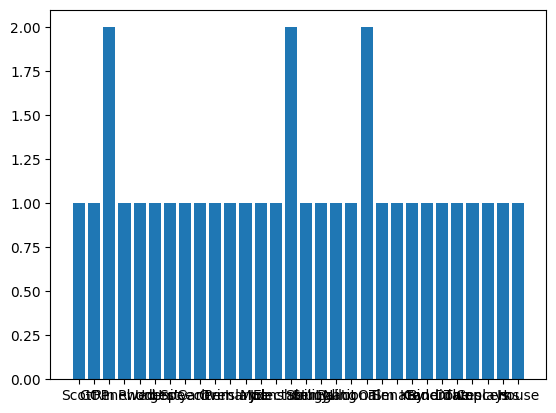

In [6]:
engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT VBAR(wordToken, total) from frequency 

""")

 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT PIE(array_agg(total), array_agg(wordToken)) from frequency 





,"pie(array_agg(total), array_agg(wordToken))"
0,True


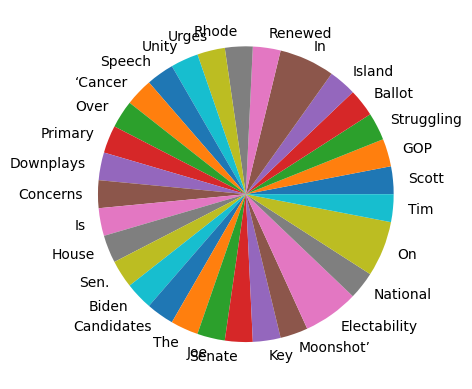

In [7]:
engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT PIE(total, wordToken) from frequency 

""")